# Complex Numbers and Interference Phenomena

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Brief Review from Lab 2

**Plotting Functions**

## STOP:  Double click this text area and type your answer to the following question:

**(1)** Look at the code immediate below.  What will the code below do.  Be as specific as possible.


a function is created that takes one input and squares it, then multiplies it by 3. then an array is created with numbers between -1 and 5, with 6 places (the x-axis inputs)...then an array of zeros is created for the y axis that is the length of the x axis array. then a for loop is ran that assigns a number to each spot on the y axis array that is called from the function. then it is plotted.

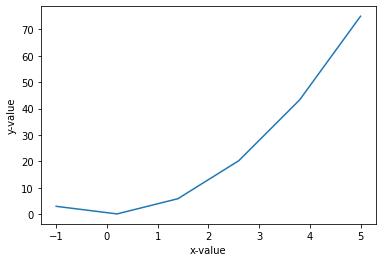

In [2]:
def plot_me(x):
    return (3 * x**2)

x_axis = np.linspace(-1,5,6)
y_axis = np.zeros(len(x_axis))
for i in range(len(x_axis)):
    y_axis[i] = plot_me(x_axis[i])
    
plt.figure()
plt.plot(x_axis,y_axis)
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.show()

In the code block below, create code that will create a graph that is:
- smooth (not jagged like the previous plot)
- a plot for x = 0 to x = 3
- plotting the function $-4.9 x^2$
- label "time" on the x-axis and "displacement" on the y-axis.

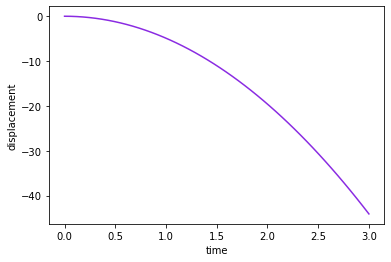

In [5]:
def fun_function(x):
    return -4.9 * x**2

xaxis = np.linspace(0,3)
yaxis = np.zeros(len(xaxis))

for i in range(len(xaxis)):
    yaxis[i] = fun_function(xaxis[i])

plt.figure()
plt.plot(xaxis, yaxis, color= "blueviolet")
plt.xlabel("time")
plt.ylabel("displacement")
plt.show()

# Sliders and animations

We created traveling waves, and were able to use a slider to "animate" them,
$$w (x,t) = \sin (2 \pi x - \pi t)$$
Run the following code and confirm the wave travels to the right.

In [6]:
def w_right(x, t):
    return np.sin(2*np.pi*x - np.pi*t)

def plot_wave(t):
    x = np.linspace(0,2,500)
    y = np.zeros(len(x))
    
    for i in range(len(x)):
        y[i] = w_right(x[i], t)
        
    plt.figure()
    plt.plot(x, y)
    plt.show()
    
widgets.interact(plot_wave, t=(0,20,0.1))

interactive(children=(FloatSlider(value=10.0, description='t', max=20.0), Output()), _dom_classes=('widget-int…

<function __main__.plot_wave(t)>

# Complex Numbers

In Python, $i = \sqrt{-1}$ is written as ``1j``.  (It should be noted that any number can precede ``j``, but a number is necessary, otherwise, Python will treat it as a variable.  We can use it with an exponential, just like any other exponential, for example, $z = e^{i \pi}$.

In [9]:
z = np.exp(1j * np.pi)
print(z)

(-1+1.2246467991473532e-16j)


What is going on here?  We begin with Euler's formula,
$$e^{i x} = \cos x + i \sin x .$$

## STOP:  Double click this text area and type your answer to the following question:
**(2)** Using Euler's formula, what do we expect for the value for $e^{i \pi}$?  Why isn't our answer exactly that?  Check your answer with the instructor, or have a discussion if you're completely unsure.

we would expect it to be -1.

Can we plot this?  Run the following code:

/var/folders/wj/vpgb50wn6ng7q81v_h_t2nfm0000gn/T/ipykernel_34221/902931747.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  ce[i] = complex_exponential(phi[i])


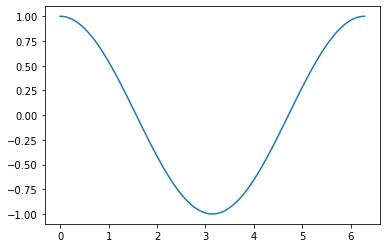

In [10]:
def complex_exponential(z):
    return np.exp(1j * z)

phi = np.linspace(0, 2*np.pi, 100)
ce = np.zeros(len(phi))

for i in range(len(phi)):
    ce[i] = complex_exponential(phi[i])
    
plt.figure()
plt.plot(phi,ce)
plt.show()

Take a moment to notice the warning.  When trying to plot complex numbers, Python only plots the real part.

There are two parts to a complex number, its real and imaginary parts.  Run the following code:

In [11]:
print(np.real(z))
print(np.imag(z))

-1.0
1.2246467991473532e-16


## STOP:  Double click this text area and type your answer to the following question:
**(3)** What does ``np.real(z)`` and ``np.imag(z)`` do?

np.real(z) is the real part of the comblex number z and np.imag(z) is the imaginary part (real+imaI)

## STOP:  Double click this text area and type your answer to the following question:

**(4)** Consider the function `fun(x)` as defined below.  What does it do?  What are three possible inputs where you can predict the output?  After you answer these questions in the space below, use the empty code box to print your three predictions to test them out.


it will store the imaginary part of the function e^ix...fun(pi) = sin(pi)= 0...fun(0)=sin(0)=0...fun(pi/2)= sin(pi/2)=1

In [13]:
def fun(x):
    return np.imag( np.exp(1j * x) )

In [14]:
print(fun(np.pi))
print(fun(0))
print(fun(np.pi/2))

1.2246467991473532e-16
0.0
1.0


We tested this function against our predictions for a few points, but how do we know that the functions are the same?  Say we have two functions:
$\displaystyle f(x) = (x + x)^2 \qquad g(x) = 4 x^2$

How do we know these functions are the same?  
- We can test a few points:  $f(0) = g(0) = 0$, $f(1) = g(1) = 4$, $f(2) = g(2) = 16$.
- But, we can also plot functions, for example, plot $f(x)$ and $g(x)$ on the same plot.
- Better yet, since it's hard to tell if the two curves are exactly the same or not, we can plot $f(x) - g(x)$, and see how close to zero it is.

0 0
4 4
16 16


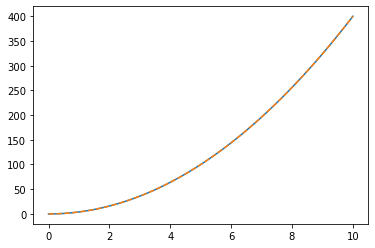

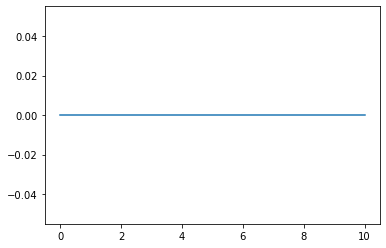

In [15]:
def f(x):
    return (x+x)**2
def g(x):
    return 4 * x**2

print(f(0), g(0))
print(f(1), g(1))
print(f(2), g(2))

x = np.linspace(0,10,100)
f_plot = np.zeros(len(x))
g_plot = np.zeros(len(x))
f_minus_g = np.zeros(len(x))
for i in range(len(x)):
    f_plot[i] = f(x[i])
    g_plot[i] = g(x[i])
    f_minus_g[i] = f(x[i]) - g(x[i])
    
plt.figure()
plt.plot(x, f_plot)
plt.plot(x, g_plot,linestyle='--')
plt.figure()
plt.plot(x, f_minus_g)
plt.show()

For ``fun(x)``, identify a real function you identified as being equivalent to ``fun``, then graph both functions on the same plot to see if the two functions are similar, then plot their difference to show that they are the same (at least to computational precision).

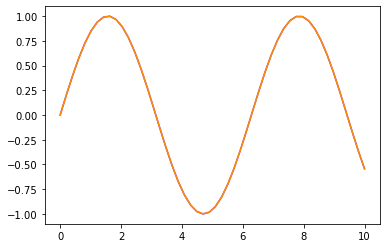

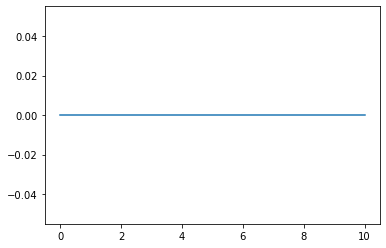

In [20]:
def f(x):
    return np.imag( np.exp(1j * x) )

def g(x):
    return np.sin(x)

x = np.linspace(0,10)
f_y = np.zeros(len(x))
g_y = np.zeros(len(x))
f_minus_g = np.zeros(len(x))

for i in range(len(x)):
    f_y[i] = f(x[i])
    g_y[i] = g(x[i])
    f_minus_g[i] = f(x[i]) - g(x[i])
    
plt.figure()
plt.plot(x, f_y, color = "blueviolet")
plt.plot(x, g_y, color = "darkorange")
plt.figure()
plt.plot(x, f_minus_g)
plt.show()

The cell below is an exact copy of the rightward moving wave above.  Change the function ``w_right(x,t)`` to be written in terms of the imaginary part of complex exponentials (and not sine).  Make sure the resulting traveling wave is correct (i.e., unchanged).

In [22]:
def w_sin(x, t):
    return np.sin(2*np.pi*x - np.pi*t)

def w_complex(x,t):
    z = 2*np.pi*x-np.pi*t
    return np.imag(np.exp(1j*z))


x= np.linspace(0,100)
sin_plot = np.zeros(len(x))
complex_plot = np.zeros(len(x))
sin_minus_complex = np.zeros(len(x))



def plot_waves(t):
    for i in range(len(x)):
        sin_plot[i] = w_sin(x[i], t)
        complex_plot[i] = w_complex(x[i], t)
        sin_minus_complex[i] = w_sin(x[i],t) - w_complex(x[i], t)
           
    plt.figure()
    plt.plot(x, sin_plot, color = "blueviolet")
    plt.plot(x, complex_plot, color = "darkorange")
    plt.figure()
    plt.plot(x, sin_minus_complex, color = "pink")
    plt.show()
    
widgets.interact(plot_waves, t=(0,20,0.1))

interactive(children=(FloatSlider(value=10.0, description='t', max=20.0), Output()), _dom_classes=('widget-int…

<function __main__.plot_waves(t)>

One more useful thing is the absolute value squared of a complex number.  Consider the function below.  Plot the function from $x = 0$ to $2 \pi$.  What do you notice about the result?

In [23]:
def absolute_value_squared(x):
    return (np.abs( complex_exponential(x) ))**2

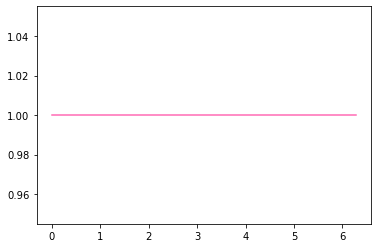

In [24]:
xaxis = np.linspace(0, 2*np.pi)
funct = np.zeros(len(x))

for i in range(len(x)):
    funct[i] = absolute_value_squared(xaxis[i])

plt.figure()
plt.plot(xaxis, funct, color= "hotpink")
plt.show()

One can think of the absolute value squared of $e^{ix} = \cos x + i \sin x$ as the sum of the real part squared and the imaginary part squared.  Almost akin to a Pythagorean theorem.  Does your result make sense?


yes it makes sense because (cosx)^2 + (sinx)^2 = 1

# Superposition and Interference

If multiple electromagnetic waves are in the same location with the same frequency, they can add and produce interesting phenomena.

One example is standing waves, in e.g., a microwave oven.  Let's consider a microwave oven, operating with frequency 2.45 GHz, wavelength 12.2 cm, and width 30.5 cm.  Let's write the electric field as the superposition of a right-moving and left-moving wave,
$$E(x,t) = \sin(k x - \omega t) + \sin(kx + \omega t),$$
with $k = 2 \pi / \lambda = 2 \pi / 12.2$, $\omega = 2 \pi f = 2 \pi (2.45)$, which uses units of cm for position and ns for time.

In the cell below, create a slider to make an animation of the wave.  You are strongly encouraged to re-purpose the code above to do this.  In doing so, there should be the following changes:
- Of course, a new function
- Label the x-axis as "x (cm)", and the y-axis as "Electric field"
- Plot the x-values from x = 0 to x = 30.5 (make sure there's enough points to ensure a smooth graph)
- Include the statement ``plt.ylim(-2.5,2.5)`` so the y-axis doesn't change its scale as the wave evolves.
- In the slider, use the interval ``t = (0, 5, 0.01)``

In [74]:
k = (2*np.pi)/12.2
w = 2*np.pi*2.45

def elec_field(x,t):
    return np.sin(k*x - w*t) + np.sin(k*x + w*t)

def plot_elec_field(t):
    xaxis = np.linspace(0, 30.5,100)
    func = np.zeros(len(xaxis))
    
    for i in range(len(xaxis)):
        func[i] = elec_field(x[i], t)
        
    plt.figure()
    plt.plot(xaxis, func, color= "darkorange")
    plt.ylim(-2.5, 2.5)
    plt.xlabel("x (cm)")
    plt.ylabel("Electric field")
    plt.show()

print(len(xaxis))    
widgets.interact(plot_elec_field, t= (0, 5, .01))

50


interactive(children=(FloatSlider(value=2.0, description='t', max=5.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot_elec_field(t)>

The intensity of the wave is proportional to the electric field squared, so create a new slider to animate
$$I (x,t) = \big[ \sin(k x - \omega t) + \sin(kx + \omega t) \big]^2,$$
Here, label the y-axis "Intensity" and choose an appropriate ``plt.ylim( , )`` statement so you can see the entirety of the result in your animation.

In [56]:
def intensity(x,t):
    return (np.sin(k*x - w*t) + np.sin(k*x + w*t))**2

x = np.linspace(0, 30.5,100)
function = np.zeros(len(x))

def intensity_plot(t):
    for i in range(len(x)):
        function[i] = intensity(x[i], t)
        
    plt.figure()
    plt.plot(x, function)
    plt.ylim(-2,4)
    plt.xlabel("x (cm)")
    plt.ylabel("intensity")
    plt.show()
    
widgets.interact(intensity_plot , t=(0, 5, .01))

interactive(children=(FloatSlider(value=2.0, description='t', max=5.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.intensity_plot(t)>

Since the oscillations of the standing wave occur on time scales of nanoseconds, it can be useful to define the time-averaged intensity, really just the average of what we saw in our previous animation.  You can notice by eye that there are nodes, locations where the intensity is always zero, and anti-nodes, locations where the intensity is maximal.

To create the time-averaged intensity, it can be useful to use complex numbers to represent the wave.  Start by representing the electric field as the **imaginary part** of
$$\tilde{E} (x,t) = e^{i (kx - \omega t)} + e^{i (-kx + \pi - \omega t)}.$$
That may seem to be an awkward way to represent it, but it is mathematically useful when both parts of the superposition are proportional to $e^{-i \omega t}$.

Create a slider using this new function that involves complex exponentials to confirm that you get the same results as before.

In [69]:
def elec_field2(x,t):
    k = (2*np.pi)/12.2
    w = 2*np.pi*2.45
    return np.imag(np.exp(1j*(k*x - w*t)) + np.exp(1j*(-k*x+np.pi-w*t)))

x = np.linspace(0, 30.5,100)
function = np.zeros(len(x))

def elec_field2_plot(t):
    for i in range(len(x)):
        function[i] = elec_field2(x[i], t)
        
    plt.figure()
    plt.plot(x, function)
    plt.ylim(-2.5,2.5)
    plt.xlabel("x (cm)")
    plt.ylabel("electric field")
    plt.show()

print(elec_field2(2.06 , 1.4))
widgets.interact(elec_field2_plot , t=(0, 5, .01))

-1.5794848968650006


interactive(children=(FloatSlider(value=2.0, description='t', max=5.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.elec_field2_plot(t)>

Using this result, it can be shown that the time-averaged intensity is proportional to:
$$I (x) = \tfrac{1}{2}\big\vert\, e^{i k x} + e^{i (-k x + \pi)} \,\big\vert^2$$
This is the absolute value squared of the complex number (excluding the $e^{-i \omega t}$).  Notice that the result is independent of time, so we can just make a regular plot (without the slider).  Create a plot of the time-averaged intensity.

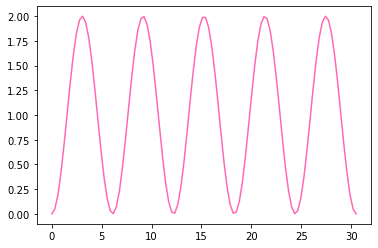

In [94]:
def time_ave_int(x):
    k = (2*np.pi)/12.2
    return .5*np.abs(np.exp(1j*k*x)+np.exp(1j*(-k*x+np.pi)))**2


xaxis = np.linspace(0, 30.5, 100)
function = np.zeros(len(x))
for i in range(len(xaxis)):
    function[i] = time_ave_int(xaxis[i])

plt.figure()
plt.plot(xaxis, function, color= "hotpink")
plt.show()